# Описание проекта

**Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.

## Загрузим данные и подготовим их к анализу

В самом начале импортируем необходимые библиотеки.

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт нужных модулей библиотеки sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
# импорт нужных модулей библиотеки scipy
from scipy.cluster.hierarchy import dendrogram, linkage

### Просмотр данных

In [2]:
# чтение файла и сохранение в соответствующую переменную
gym_df = (
    pd.read_csv('/gym_churn.csv')
)

Посмотрим, какие данные у нас имеются.

In [3]:
# общая информация о таблице gym_df
gym_df.info()
# получение первых 10 строк таблицы gym_df
gym_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


В таблице `gym_df` 4000 строк и 14 столбцов. Типы данных, встречаемых в столбцах: `float`(4) и `int`(10).

Описание данных согласно документации:
* `gender` — пол;
* `Near_Location` - проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* `Group_visits` - факт посещения групповых занятий;
* `Age` - возраст;
* `Avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
* `Month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах);
* `Lifetime` - время с момента первого обращения в фитнес-центр (в месяцах);
* `Avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц;
* `Churn` - факт оттока в текущем месяце.

В названиях колонок нарушений стиля не наблюдаем. Типы данных не требуют дополнительных преобразований. Количество значений в столбцах совпадает с количеством строк - пропусков нет.

### Проверка явных дубликатов

Проведём проверку на явные дубликаты.

In [4]:
# подсчёт явных дубликатов
print("Кол-во дубликатов: {}".format(gym_df.duplicated().sum()))

Кол-во дубликатов: 0


**Вывод**

Первично ознакомились с нашими данными и на первый взгляд особо ничего обрабатывать не нужно. Пока. Пропусков нет, столбцы названы стилистически корректно, типы данных не требуют преобразований, явных дубликатов не обнаружено.

## Проведём исследовательский анализ данных (EDA)

Посмотрим подробнее на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения. Затем
взглянем на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток),
рассмотрим матрицу корреляций.

### Взглянем на числовые сведения о датасете

In [5]:
# вызовем к датафрейму метод describe()
gym_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Вывод**

Видим, что признаки пола, проживания или работы в районе фитнес-центра, принадлежность к компании-партнёру, участие в акции "Приведи друга", наличие номера телефона, посещения групповых занятий и оттока принимают только значения 0 и 1. Средняя длительность текущего действующего абонемента - более 4.5 месяцев, медиана - 1 месяц. Средний возраст и медиана - 29 лет. Средний срок окончания действующего абонемента - более 4 месяцев, медиана - 1 месяц. Средняя частота посещений за всё время в неделю очень близка к медиане и составляет почти 2 раза. А вот частота за предыдущий месяц уже чуть меньше, но не существенно. Среднее время с момента первого обращения чуть менее 4 месяцев, а медианное значение - 3 месяца.

### Сравним группу ушедших в отток и оставшихся

Сгруппируем датафрейм по признаку оттока и сравним средние значения между двумя группами.

In [6]:
# группируем и выводим средние значения
gym_df.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Вывод**

Гендерное соотношение примерно равное, также как и наличие контактного телефона и возраст. Замечаем, что у ушедших в отток пользователей значение признаков проживания или работы в районе фитнес-центра, принадлежности к компании-партнёру, участия в акции "Приведи друга", факта посещения групповых занятий ниже. Длительность текущего действующего абонемента у ушедших также ниже, как и срок до конца текущего абонемента, от них меньше выручки за дополнительные услуги фитнес-центра, время с момента первого посещения прошло меньше, да и среднее количество посещений в неделю меньше. Обращаем внимание, что по всем пользователям среднее количество посещений в неделю за предыдущий месяц снизилось. Теперь замечаем, что оставшиеся посетители ходят с той же частотой, что и раньше, но вот те, кто попал в отток, ходили в предыдущий месяц меньше обычного.

### Посмотрим гистограммы и распределения признаков для групп

Посмотрим на количество посетителей в наших группах.

In [7]:
# подсчёт количества уникальных значений в столбце 'Churn'
gym_df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Отмечаем для себя, что количество посетителей в оттоке в три раза меньше тех, кто остался. Далее зададим список с названиями графиков, которые будут отражать распределения признаков для групп, затем выведем сами графики.

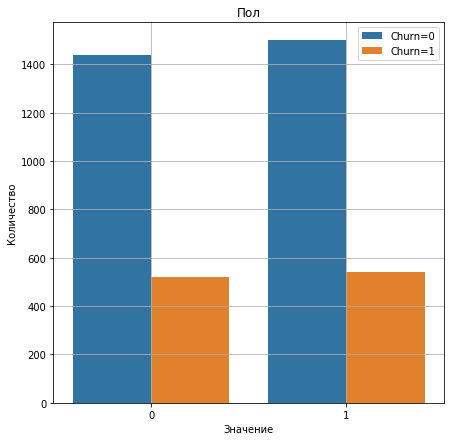

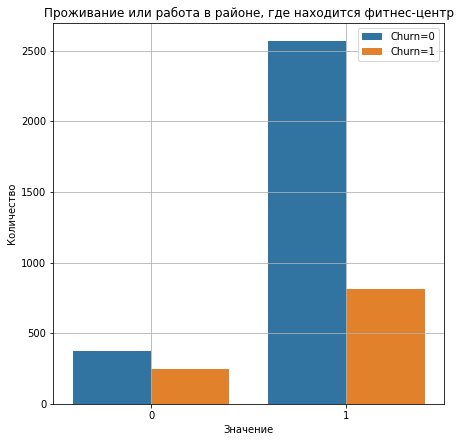

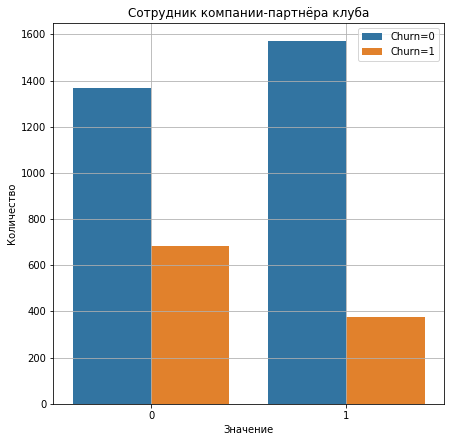

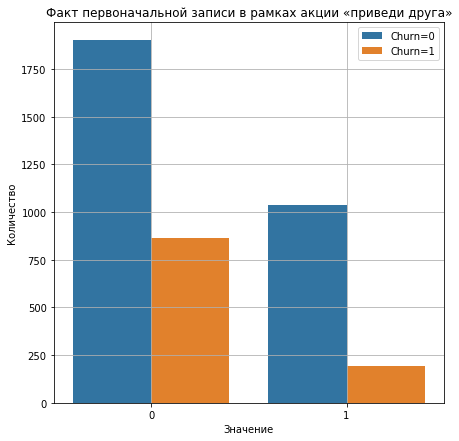

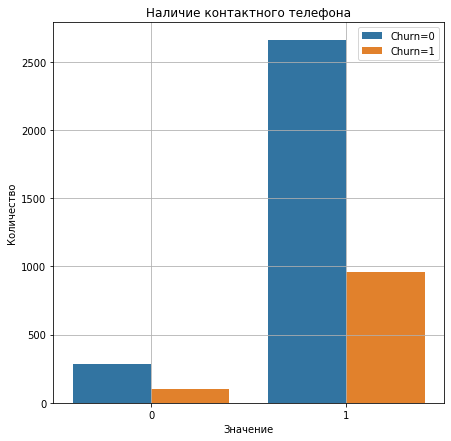

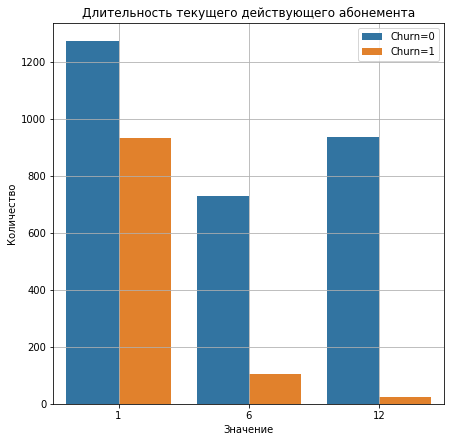

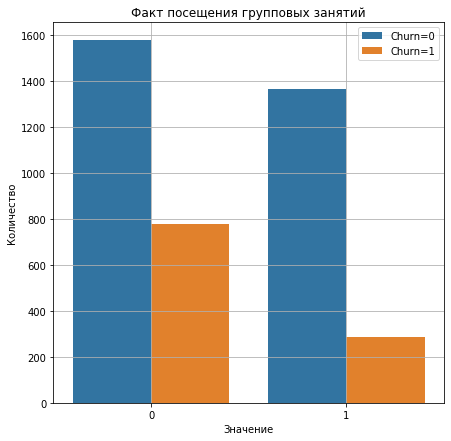

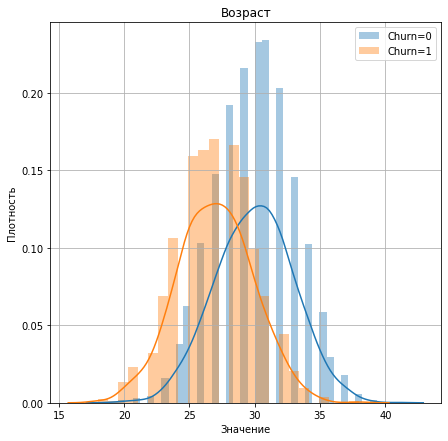

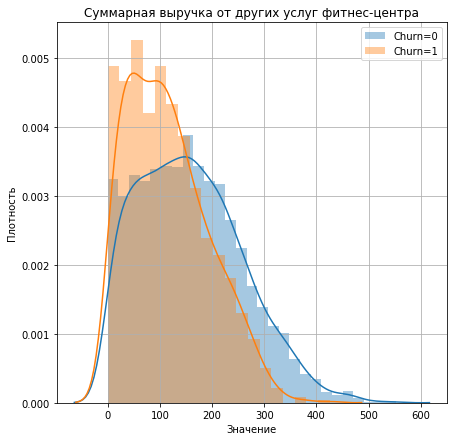

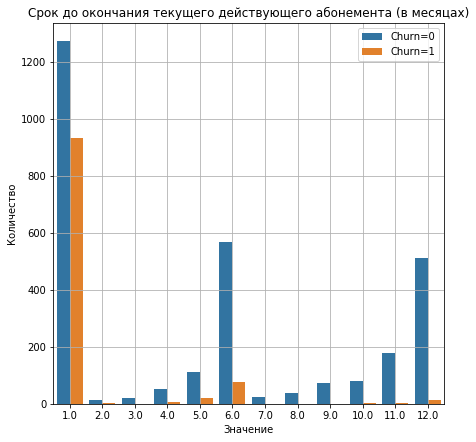

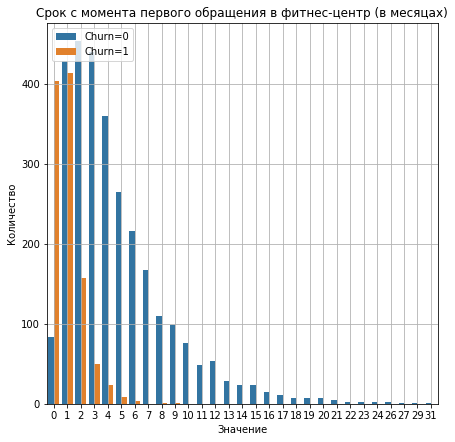

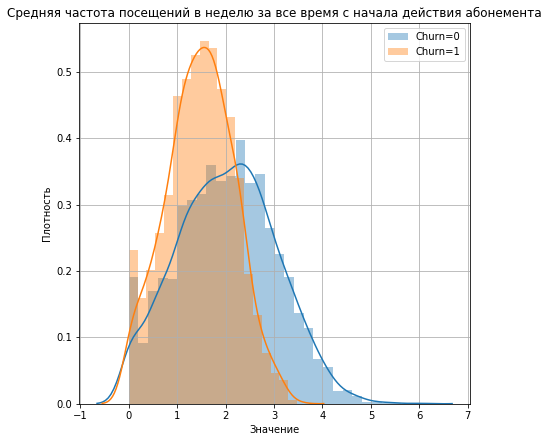

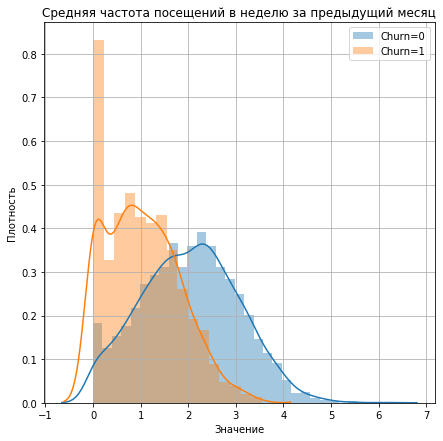

In [8]:
# создадим список с названиями признаков
titles = ['Пол',
          'Проживание или работа в районе, где находится фитнес-центр',
          'Сотрудник компании-партнёра клуба',
          'Факт первоначальной записи в рамках акции «приведи друга»',
          'Наличие контактного телефона',
          'Длительность текущего действующего абонемента',
          'Факт посещения групповых занятий',
          'Возраст',
          'Суммарная выручка от других услуг фитнес-центра',
          'Срок до окончания текущего действующего абонемента (в месяцах)',
          'Срок с момента первого обращения в фитнес-центр (в месяцах)',
          'Средняя частота посещений в неделю за все время с начала действия абонемента',
          'Средняя частота посещений в неделю за предыдущий месяц']
discrete_columns = ['gender',
                    'Near_Location',
                    'Partner',
                    'Promo_friends',
                    'Phone',
                    'Contract_period',
                    'Group_visits',
                    'Month_to_end_contract',
                    'Lifetime']
# зададим размер графика
plt.rcParams["figure.figsize"] = (7,7)
# возьмём список столбцов кроме целевой переменной
columns = gym_df.columns[:-1]
# с помошью цикла построим графики для каждого признака
for i in range(len(columns)):
    if columns[i] in discrete_columns:
        sns.countplot(x=columns[i], data=gym_df, hue='Churn')
        # отобразим линии сетки
        plt.grid(True)
        # задаём название графика
        plt.title(titles[i])
        # задаём подпись оси X
        plt.xlabel("Значение")
        # задаём подпись оси Y
        plt.ylabel("Количество")
        # отобразим легенду на графике
        plt.legend(['Churn=0', 'Churn=1'])
        plt.show()
    else:
        sns.distplot(gym_df[gym_df['Churn'] == 0][columns[i]], label='Churn=0')
        sns.distplot(gym_df[gym_df['Churn'] == 1][columns[i]], label='Churn=1')
        # отобразим линии сетки
        plt.grid(True)
        # задаём название графика
        plt.title(titles[i])
        # задаём подпись оси X
        plt.xlabel("Значение")
        # задаём подпись оси Y
        plt.ylabel("Плотность")
        # отобразим легенду на графике
        plt.legend()
        plt.show()

**Выводы:**
* по полу плотность распределения схожая у обеих групп;
* посетители из обеих групп живут или работают недалеко от фитнес-центра;
* среди посетителей, не попавших в отток, более высокие доли сотрудников компаний-партнёров, участников акции "Приведи друга", посещения групповых занятий;
* распределения по возрасту несколько различаются: в оттоке более молодые посетители;
* распределение по выручке у тех, кто в оттоке, расположено ближе к нулю и имеет более резкий уклон после пиков, нежели у лояльных клиентов;
* у большинства тех, кто в оттоке, срок окончания текущего абонемента составляет 1 месяц, но и срок с момента первого обращения в фитнес-центр зачастую не более пары месяцев;
* у пользователей из оттока распределение по средней частоте посещения в неделю за всё время имеет пик в районе 1-2 раз, затем к 3-4 идёт резкий обвал до 0. У второй группы более плавное распределение, пик смещён в район 2-3 посещений, далее спад более "размазан";
* по средней частоте посещений в неделю за предыдущий месяц у тех, кто не в оттоке, график распределения практически не отличается от средней частоты посещений за весь срок действия абонемента. У противоположной группы, которая в оттоке, пик находится в районе 0, дальнейшее распределение находится в районе 1-3 посещений.

### Посмотрим матрицу корреляций

Расммотрим матрицу корреляций, поищем сильно коррелирующие признаки.

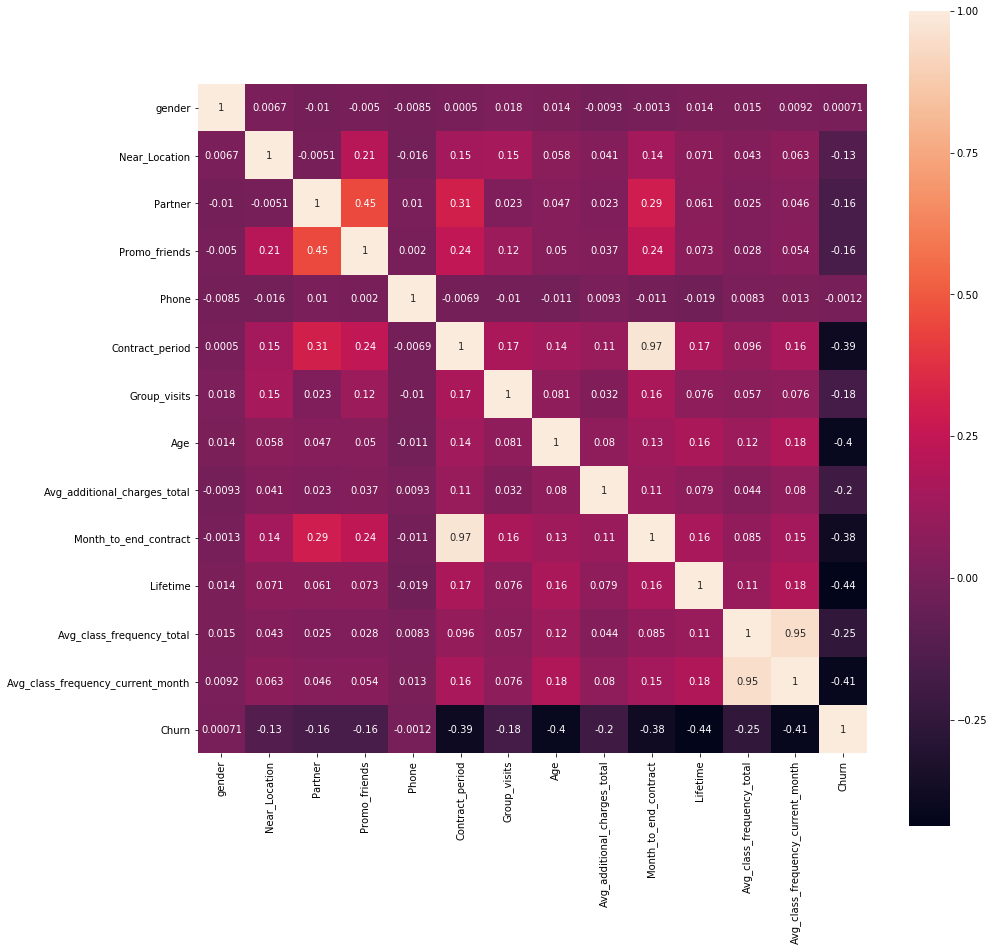

In [9]:
# зададим размер графика
plt.rcParams["figure.figsize"] = (15,15)
#построим и отрисуем матрицу корреляций
corr_matrix = gym_df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots()
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(corr_matrix, annot = True, square=True) #ваш код здесь
plt.show()

Судя по матрице, сильной корреляции между целевой переменной и признаками не видно. Зато видно две пары скоррелированных признаков:
* средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц;
* срок до окончания текущего действующего абонемента (в месяцах) и длительность текущего действующего абонемента.

## Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Сначала разобьём данные на обучающую и валидационную выборку функцией, затем
обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Для них оценим метрики accuracy, precision и recall на валидационной выборке и сравним по ним модели, выберем лучшую.

In [10]:
# разделяем наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_df.drop('Churn', axis=1)
y = gym_df['Churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# преобразуем обучающий и валидационный наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
# зададим алгоритм логистической регрессии для нашей модели
model = LogisticRegression(solver='liblinear', random_state=0)
# обучим модель
model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:, 1]
# выведем метрики
print('Метрики для логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем метрики
print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Метрики для логистической регрессии:
Accuracy: 0.94
Precision: 0.90
Recall: 0.85
F1: 0.87
ROC_AUC: 0.98

Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85
ROC_AUC: 0.97


**Вывод**

Метрики `ROC_AUC` и `accuracy` равны у обеих моделей, но по `precision`, `recall` и `F1` видим небольшое преимущество логистической регрессии над случайным лесом.

## Сделаем кластеризацию клиентов

Сначала стандартизируем данные, затем построим матрицу расстояний и выведем дендрограмму. Далее обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов, построим распределения признаков для кластеров и для каждого кластера посчитаем долю оттока.

### Выведем дендрограмму

Стандартизируем данные, применим фунцию `linkage()`, чтобы получить таблицу "связок" между объектами, которую уже визуализируем с помощью дендрограммы.

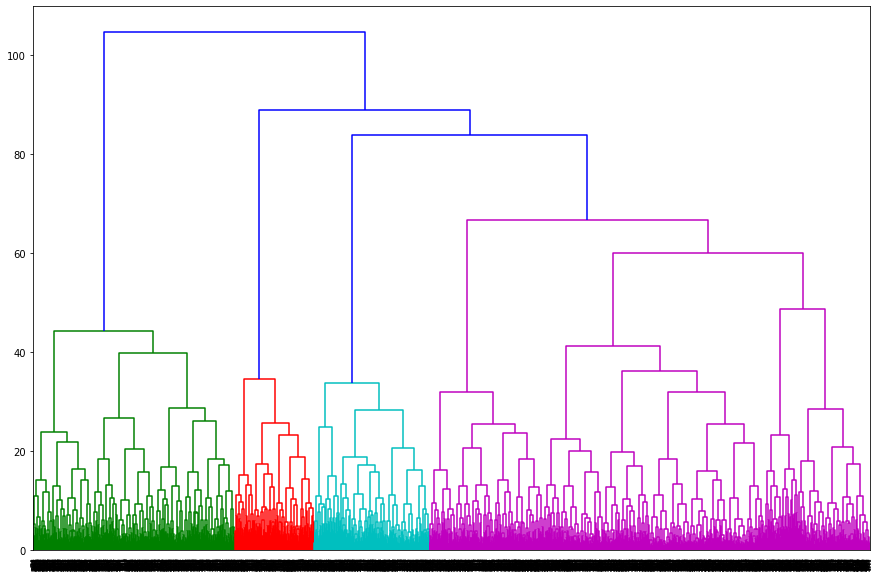

In [11]:
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# передаём получившуюся стандартизированную таблицу в качестве
# параметра в функцию linkage()
linked = linkage(X_sc, method = 'ward')
# задаём размер графика
plt.figure(figsize=(15, 10))
# выводим дендрограмму
dendrogram(linked, orientation='top')
plt.show()

**Вывод**

Агломеративная иерархическая кластеризация предложила оптимальное количество кластеров 4 - четыре разных цвета на графике.

### Кластеризация с помощью K-Means

#### Сравним средние значения признаков

Стандартизируем данные, затем зададим модель K-Means с чилом кластеров 5 и взглянем на средние значения признаков по кластерам.

In [12]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_df)
# задаём модель k-means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле нашего датасета
gym_df['cluster'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
print(gym_df.groupby('cluster').agg(['mean']))

           gender Near_Location   Partner Promo_friends     Phone  \
             mean          mean      mean          mean      mean   
cluster                                                             
0        0.503676      0.000000  0.459559      0.075368  0.917279   
1        0.492829      0.936115  0.764016      0.534550  0.919166   
2        0.507917      1.000000  0.323995      0.213155  0.903776   
3        0.521186      0.996610  0.282203      0.208475  0.904237   
4        0.518895      0.968023  0.744186      0.526163  0.873547   

        Contract_period Group_visits        Age Avg_additional_charges_total  \
                   mean         mean       mean                         mean   
cluster                                                                        
0              2.069853     0.211397  28.522059                   132.741216   
1             10.447197     0.516297  29.962190                   161.853561   
2              1.546894     0.287454  26.926918

**Вывод**

Видим, что в кластерах 1 и 4 наиболее высокая доля посетителей из компаний-партнёров. Они также имеют высокие показатели признаков нахождения рядом с фитнес-центром и среди них самая высока доля участников акции "Приведи друга". Похоже, что в эти два кластера преимущественно попали посетители, которые работают рядом. У них самые длительные абонементы, больше всего посещений групповых занятий, они приносят больше всего выручки от побочных услуг. Различает их то, что посетители из кластера 1 самые частые гости фитнес-центра, тогда как кластер 4 - наоборот. Интересно тоже, что в кластере 0 примерно ни одного посетителя, который бы жил или работал рядом с фитнес-центром. По значениям признаков является середнячком)

#### Построим распределения признаков по кластерам

Список с названиями графиков у нас уже есть, выведем сами графики распределения признаков по кластерам.

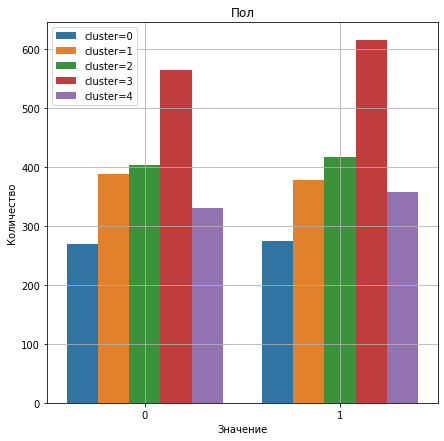

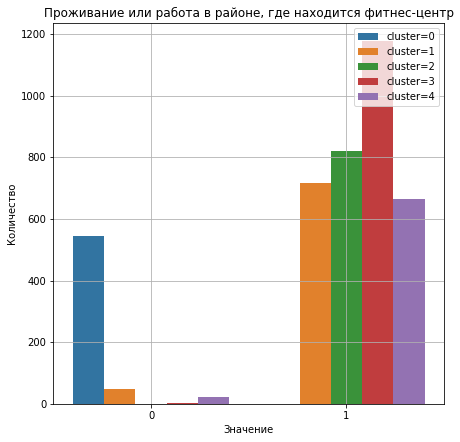

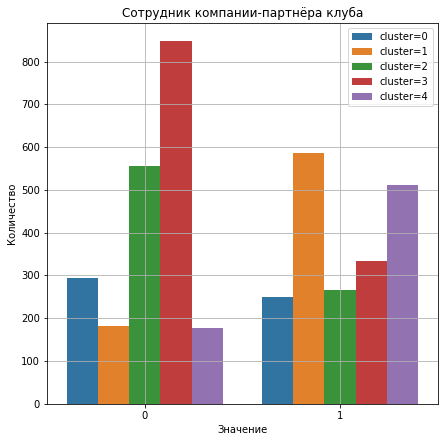

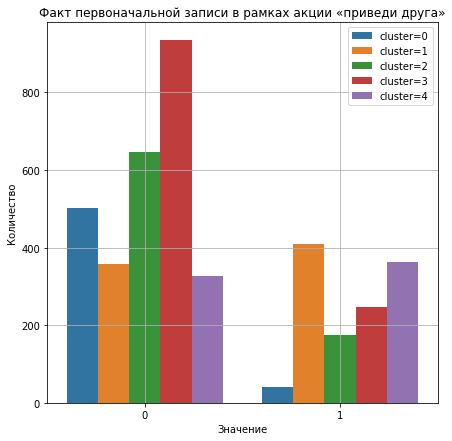

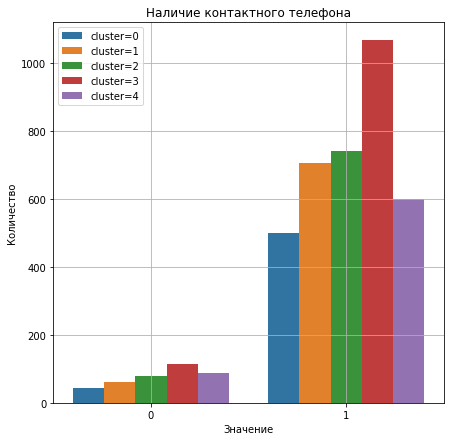

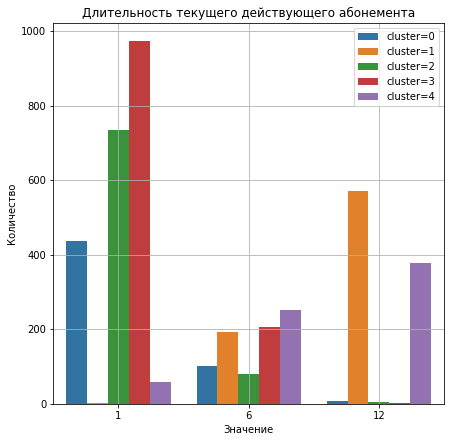

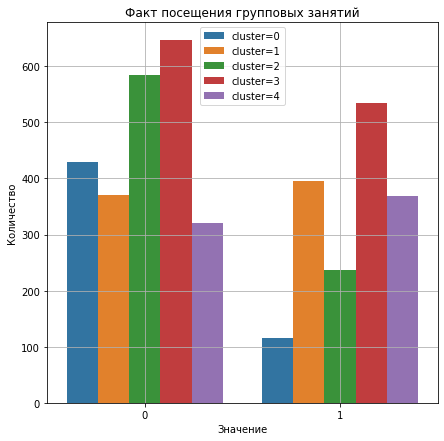

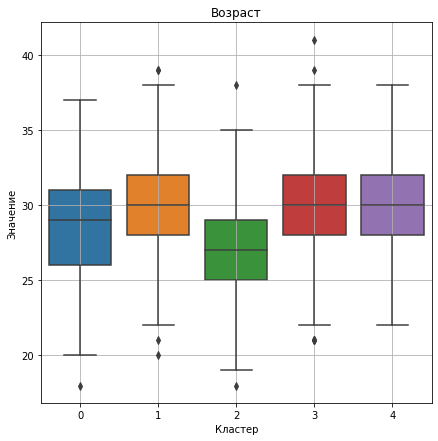

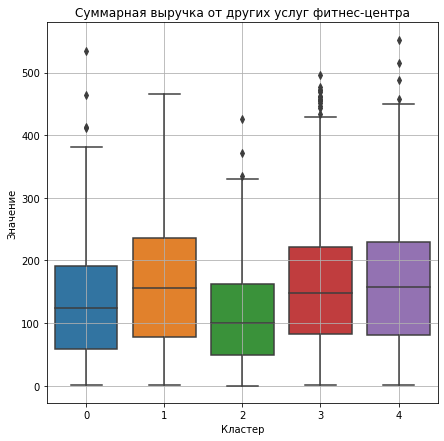

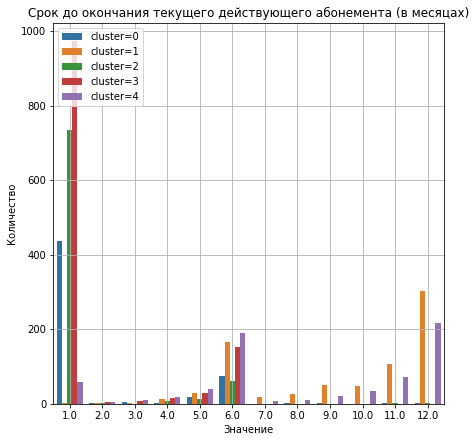

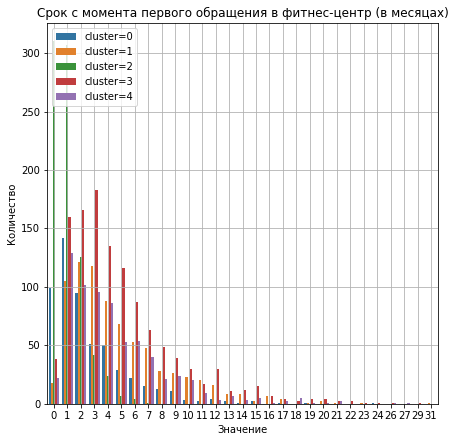

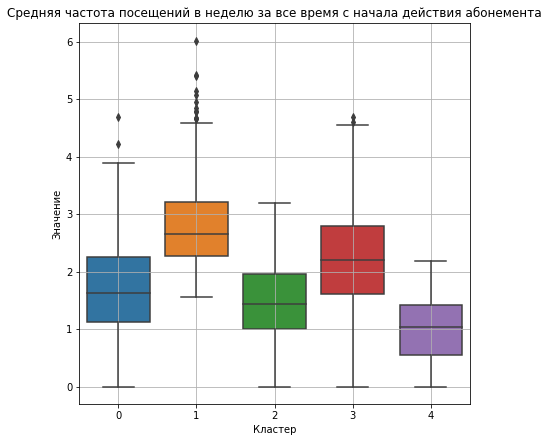

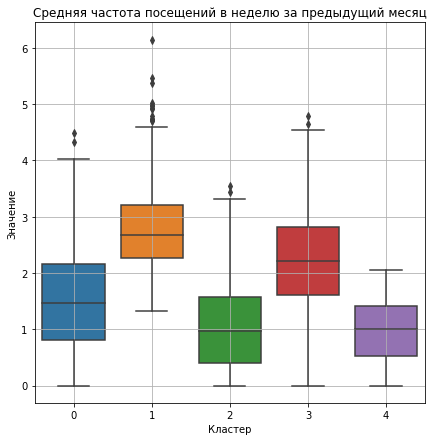

In [13]:
# зададим размер графика
plt.rcParams["figure.figsize"] = (7,7)
# с помошью цикла построим графики для каждого признака
for i in range(len(columns)):
    if columns[i] in discrete_columns:
        sns.countplot(x=columns[i], data=gym_df, hue='cluster')
        # отобразим линии сетки
        plt.grid(True)
        # задаём название графика
        plt.title(titles[i])
        # задаём подпись оси X
        plt.xlabel("Значение")
        # задаём подпись оси Y
        plt.ylabel("Количество")
        # отобразим легенду на графике
        plt.legend(['cluster=0', 'cluster=1', 'cluster=2', 'cluster=3', 'cluster=4'])
        plt.show()
    else:
        sns.boxplot(x='cluster', data=gym_df, y=columns[i])
        # отобразим линии сетки
        plt.grid(True)
        # задаём название графика
        plt.title(titles[i])
        # задаём подпись оси X
        plt.xlabel("Кластер")
        # задаём подпись оси Y
        plt.ylabel("Значение")
        plt.show()

**Вывод**

Графики показывают, что кластер 2 приносит меньше всего выручки, посещаемость проседает относительно других, меньше участвует в акциях и посетители в нём самые свежие по дате первой явки в фитнес-центр.

#### Доли оттока по кластерам

Сгруппируем отток по кластерам и сравним.

In [14]:
# создадим функцию для нужных расчётов и применим её
def summary(x):
    result = {
        'users_count': x['Churn'].count(),
        'churn_users_count': x['Churn'].sum(),
        'churn_rate': round(x['Churn'].sum() / x['Churn'].count() * 100, 2)
    }
    return pd.Series(result)
gym_df.groupby(['cluster']).apply(summary)

,users_count,churn_users_count,churn_rate
cluster,,,
0,544.0,245.0,45.04
1,767.0,6.0,0.78
2,821.0,789.0,96.10
3,1180.0,4.0,0.34
4,688.0,17.0,2.47


**Вывод**

Кластеры 1, 3 и 4 имеют минимальные доли оттока. Из кластера 2 отвалились почти все посетители. Из кластера 0 отток составил чуть более 45%.

## Общий вывод и рекомендации

### Выводы

* При общем взгляде на посетителей в совокупности гендерное соотношение примерно равное, также как и наличие контактного телефона и возраст. У ушедших в отток пользователей значение признаков проживания или работы в районе фитнес-центра, принадлежности к компании-партнёру, участия в акции "Приведи друга", факта посещения групповых занятий ниже. Длительность текущего действующего абонемента у ушедших также ниже, как и срок до конца текущего абонемента, от них меньше выручки за дополнительные услуги фитнес-центра, время с момента первого посещения прошло меньше, да и среднее количество посещений в неделю меньше. По всем пользователям среднее количество посещений в неделю за предыдущий месяц снизилось. Оставшиеся посетители ходят с той же частотой, что и раньше, но вот те, кто попал в отток, ходили в предыдущий месяц меньше обычного;


* Общее количество посетителей в оттоке в три раза меньше тех, кто остался;


* Агломеративная иерархическая кластеризация предложила оптимальное количество кластеров равное 4;


* Видим, что в кластерах 1 и 4 наиболее высокая доля посетителей из компаний-партнёров. Они также имеют высокие показатели признаков нахождения рядом с фитнес-центром и среди них самая высока доля участников акции "Приведи друга". Похоже, что в эти два кластера преимущественно попали посетители, которые работают рядом. У них самые длительные абонементы, больше всего посещений групповых занятий, они приносят больше всего выручки от побочных услуг. Различает их то, что посетители из кластера 1 самые частые гости фитнес-центра, тогда как кластер 4 - наоборот. Интересно тоже, что в кластере 0 примерно ни одного посетителя, который бы жил или работал рядом с фитнес-центром. По значениям признаков является середнячком);


* Кластеры 1, 3 и 4 имеют минимальные доли оттока. Из кластера 2 отвалились почти все посетители. Из кластера 0 отток составил чуть более 45%.

### Рекомендации

* Обнаружился определённый кластер посетителей, которые практически все ушли в отток. Они чуть моложе по возрасту, многие присоединились недавно и имеют маленький срок действия текущего абонемента. Редко посещают фитнес-центр - приносят меньше побочной прибыли и не приводят друзей. Возможно, недавно проходила какая-то акция по привлечению новых клиентов, но она не зашла совсем, возможно, была неудачно выбрана целевая аудитория;


* Наиболее лояльные посетители имеют наибольший процент по участию в акции "Приведи друга", среди них наивысшая доля людей, представляющий компании-партнёры, также набольшая доля тех, кто живёт или работает рядом с фитнес-центром. Такие посетители чаще ходят на занятия, в том числе на групповые, из-за этого приносят больше выручки от побочных услуг фитнес-центра и, вероятно, могут рекомендовать наше заведение и приводить друзей;


* Судя по всему, нужно больше акцентировать внимание на сотрудничество с компаниями-партнёрами, повышать привлекательность условий для корпоративных клиентов и расширять партнёрскую сеть.


* Очевидно, что люди, для которых фитнес-центр не находится рядом с домом или работой, будут частенько отваливаться и переходить в фитнес-центры, которые им по пути. Или возвращаться домой на диван) В связи с этим, акцент на привлечение должен быть в непосредственном районе расположения фитнес-центра. Можно попробовать раздачу каких-то флаеров на улице, либо вывод контекстной рекламы в интернете, когда поиск или пост связан с районом расположения нашего заведения.